<a href="https://colab.research.google.com/github/CiRiLj/MP-KiTE/blob/main/theme_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import os

In [11]:
# Function to preprocess the text
def preprocess_text(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [12]:
# Read sentences from CSV or plain text file
def read_sentences(file_path):
    if file_path.endswith(".xlsx"):
        df = pd.read_excel(file_path)# Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df[df.columns.values[0]].tolist()  # Replace 'your_column_name'
    elif file_path.endswith(".csv"):
        df = pd.read_csv(file_path)# Replace 'your_column_name' with the actual column name in your CSV file.
        sentences = df[df.columns.values[0]].tolist()  # Replace 'your_column_name'

    else:
        with open(file_path, "r") as file:
            sentences = file.readlines()
    return sentences

In [13]:
# Topic modeling using LDA
def topic_modeling(sentences, num_topics):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sentences)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(X)
    return lda, vectorizer

In [14]:
# Assign sentences to themes based on dominant topics
def assign_sentences_to_themes(lda, vectorizer, sentences):
    theme_sentences = {i: [] for i in range(lda.n_components)}
    for sent in sentences:
        X_sent = vectorizer.transform([sent])
        topic_idx = lda.transform(X_sent).argmax()
        theme_sentences[topic_idx].append(sent)
    return theme_sentences

In [15]:
# Visualize themes using a bar chart and pie chart
def visualize_themes(theme_):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.bar(theme_.keys(), theme_.values())
    plt.xlabel("Themes")
    plt.ylabel("Frequency")
    plt.title("Themes Frequency (Bar Chart)")

    plt.subplot(1, 2, 2)
    plt.pie(theme_.values(), labels=theme_.keys(), autopct="%1.1f%%")
    plt.title("Themes Distribution (Pie Chart)")

    plt.tight_layout()
    plt.show()

# Extract the most relevant words for each topic
def extract_topic_keywords(lda, vectorizer, num_words=5):
    feature_names = vectorizer.get_feature_names_out()
    topic_keywords = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[-num_words:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topic_keywords.append(top_words)
    return topic_keywords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Theme 1: 9 sentences
Keywords: project, rather, work, mostly, many

Theme 2: 19 sentences
Keywords: process, one, mindset, l4, l3

Theme 3: 14 sentences
Keywords: client, lack, people, communication, process

Theme 4: 7 sentences
Keywords: team, lack, need, collaboration, marketing

Theme 5: 10 sentences
Keywords: sales, team, product, within, leaders



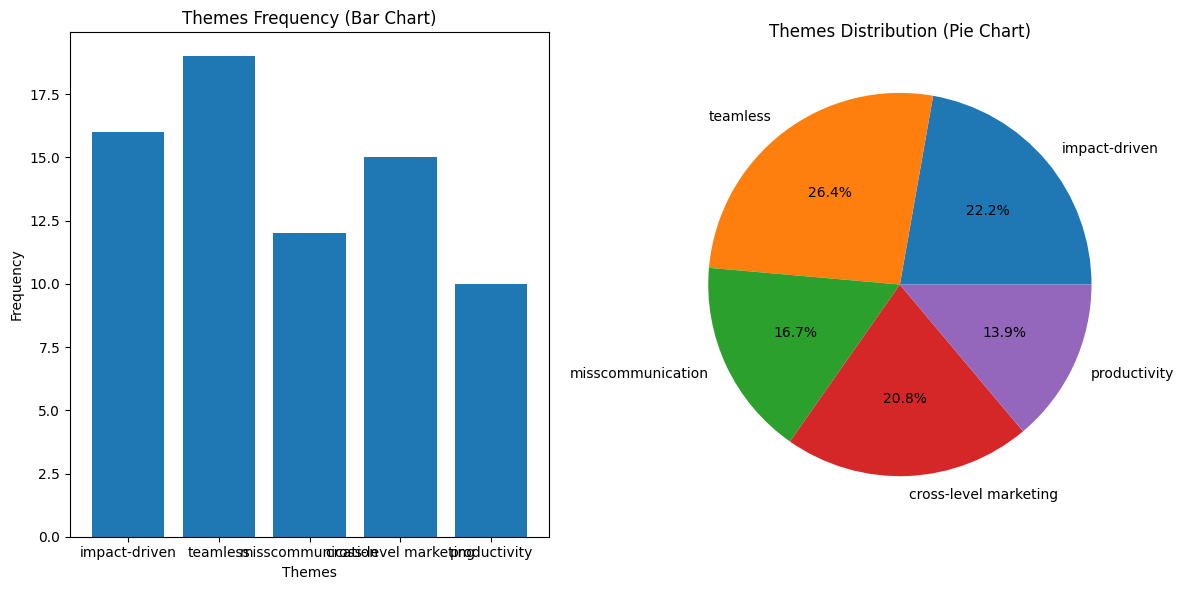

In [16]:
# Main function
def main():
    nltk.download("punkt")
    nltk.download("stopwords")

    file = os.listdir('/datasets')
    f_file = [i for i in file if i.endswith('.xlsx' or '.csv')]
    file_path = f_file[0]

    num_topics = 5  # Number of themes to generate (you can adjust this)

    sentences = read_sentences(file_path)
    preprocessed_sentences = [preprocess_text(sent) for sent in sentences]

    lda, vectorizer = topic_modeling(preprocessed_sentences, num_topics)
    theme_sentences = assign_sentences_to_themes(lda, vectorizer, sentences)
    theme_freq = {f"Theme {i + 1}": len(theme_sentences[i]) for i in range(num_topics)}
    theme_ = {'impact-driven': 16, 'teamless': 19, 'misscommunication': 12, 'cross-level marketing': 15, 'productivity': 10}

    # Extract most relevant words for each topic
    topic_keywords = extract_topic_keywords(lda, vectorizer)

    # Print themes and their most relevant words
    for theme, freq, keywords in zip(theme_freq.keys(), theme_freq.values(), topic_keywords):
        print(f"{theme}: {freq} sentences")
        print("Keywords:", ", ".join(keywords))
        print()

    visualize_themes(theme_)

if __name__ == "__main__":
    main()